In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib 
import os

C:\Users\Luis\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [120]:
os.chdir('C:/Users/Luis/Box/R15 Sensor Preprocessing and Analysis/JPCS Special Issue') #set directory for desktop
#os.chdir('/Users/sandoval/Library/CloudStorage/Box-Box/R15 Sensor Preprocessing and Analysis/JPCS Special Issue') #this is for when i use my mac instead of my desktop
raw = pd.read_csv('Full_Summary_Features_clean_2-24-2024.csv') #filtered summary data from madison

In [121]:
#i want to see all the columns so i can specifically pick the features i actually want
    #we are going to make a dataset containing just restrict alongside predictors aka physio
    #then we are going to make another dataset containing just urge to restrict alongside physio
    #we don't want to include any other EMA in our train/test data for each analysis

for col in raw.columns: 
    print(col) 

Unnamed..0
Time
HR_Mean
HR_Minimum
HR_Maximum
HR_Stdev
HR_RMS
HR_MAD
HR_MAV
HR_Median
HR_P25
HR_P75
EDA_Mean
EDA_Minimum
EDA_Maximum
EDA_Stdev
EDA_RMS
EDA_MAD
EDA_MAV
EDA_Median
EDA_P25
EDA_P75
TEMP_Mean
TEMP_Minimum
TEMP_Maximum
TEMP_Stdev
TEMP_RMS
TEMP_MAD
TEMP_MAV
TEMP_Median
TEMP_P25
TEMP_P75
meanCenteredEDA_Mean
meanCenteredEDA_Minimum
meanCenteredEDA_Maximum
meanCenteredEDA_Stdev
meanCenteredEDA_RMS
meanCenteredEDA_MAD
meanCenteredEDA_MAV
meanCenteredEDA_Median
meanCenteredEDA_P25
meanCenteredEDA_P75
meanCenteredHR_Mean
meanCenteredHR_Minimum
meanCenteredHR_Maximum
meanCenteredHR_Stdev
meanCenteredHR_RMS
meanCenteredHR_MAD
meanCenteredHR_MAV
meanCenteredHR_Median
meanCenteredHR_P25
meanCenteredHR_P75
meanCenteredTEMP_Mean
meanCenteredTEMP_Minimum
meanCenteredTEMP_Maximum
meanCenteredTEMP_Stdev
meanCenteredTEMP_RMS
meanCenteredTEMP_MAD
meanCenteredTEMP_MAV
meanCenteredTEMP_Median
meanCenteredTEMP_P25
meanCenteredTEMP_P75
ethica_time
lag
tdif
cumsumT
ethica_time_utc
dayvar
beepvar


In [122]:
#descriptives for paper

raw['restrict'].mean()
raw['restrict'].min()
raw['restrict'].max()
raw['restrict'].std()

34.06041654648963

In [123]:
raw['urge_restrict'].mean()
raw['urge_restrict'].min()
raw['urge_restrict'].max()
raw['urge_restrict'].std()

31.124504242823576

In [124]:
#row_nan_count = .isna().sum(axis=1)

raw["urge_restrict"].isna().sum() #71 urge_restrict points missing 
raw["restrict"].isna().sum() #54 restrict items missing
len(raw["urge_restrict"])
raw

,Unnamed..0,Time,HR_Mean,HR_Minimum,HR_Maximum,HR_Stdev,HR_RMS,HR_MAD,HR_MAV,HR_Median,...,socialanx_medCentered,sens_body_meanCentered,sens_body_medCentered,ridthoughts_meanCentered,ridthoughts_medCentered,memories_meanCentered,memories_medCentered,chewspit_meanCentered,chewspit_medCentered,PR
0,117,58:00.0,93.129563,66.83,120.20,14.947826,94.321047,13.171499,120.20,94.550,...,21.0,0.279661,-1.0,13.211864,3.0,10.110169,-0.5,0.000000,0.0,PR003
1,116,28:00.0,67.698626,56.77,85.90,6.844791,68.043630,5.718079,85.90,67.030,...,22.0,3.279661,2.0,7.211864,-3.0,-58.889831,-69.5,0.000000,0.0,PR003
2,115,56:00.0,70.553065,55.93,93.38,9.837114,71.235269,7.708571,93.38,68.850,...,0.0,-1.720339,-3.0,12.211864,2.0,-58.889831,-69.5,0.000000,0.0,PR003
3,114,56:00.0,90.937768,57.98,149.50,25.878040,94.546664,23.029055,149.50,84.100,...,0.0,-2.720339,-4.0,3.211864,-7.0,9.110169,-1.5,0.000000,0.0,PR003
4,113,25:00.0,74.612836,57.92,93.05,10.477028,75.344527,8.849632,93.05,75.700,...,0.0,1.279661,0.0,17.211864,7.0,9.110169,-1.5,0.000000,0.0,PR003
5,112,17:00.0,88.017751,61.85,125.70,16.010163,89.461405,12.062949,125.70,86.200,...,0.0,12.279661,11.0,12.211864,2.0,15.110169,4.5,0.000000,0.0,PR003
6,111,24:00.0,69.070133,50.00,102.03,15.508795,70.789165,13.254219,102.03,67.330,...,0.0,9.279661,8.0,17.211864,7.0,17.110169,6.5,0.000000,0.0,PR003
7,110,55:00.0,96.050275,93.98,99.62,1.216136,96.057970,0.869442,99.62,95.950,...,17.0,7.279661,6.0,20.211864,10.0,17.110169,6.5,0.000000,0.0,PR003
8,109,36:00.0,78.444540,60.12,103.13,13.008520,79.515388,10.979822,103.13,78.480,...,0.0,-1.720339,-3.0,3.211864,-7.0,9.110169,-1.5,0.000000,0.0,PR003
9,108,05:00.0,76.180916,55.52,110.82,15.808667,77.803225,13.118658,110.82,71.670,...,31.0,-1.720339,-3.0,12.211864,2.0,11.110169,0.5,0.000000,0.0,PR003


In [125]:
#random seed. I picked 6 because I like 6 and i always pick 6. this is so we get the same results every time
np.random.seed(6)

In [129]:
corrs = raw.filter(['meanCenteredEDA_Mean', 'meanCenteredEDA_Minimum', 'meanCenteredEDA_Maximum', 'meanCenteredEDA_Stdev',  
                    'meanCenteredEDA_RMS', 'meanCenteredEDA_MAD', 'meanCenteredEDA_MAV', 'meanCenteredEDA_Median',
                    'meanCenteredEDA_P25', 'meanCenteredEDA_P75', 'meanCenteredHR_Mean', 'meanCenteredHR_Minimum', 
                    'meanCenteredHR_Maximum', 'meanCenteredHR_Stdev', 'meanCenteredHR_RMS', 'meanCenteredHR_MAD',
                    'meanCenteredHR_MAV', 'meanCenteredHR_Median', 'meanCenteredHR_P25', 'meanCenteredHR_P75',
                    'meanCenteredTEMP_Mean', 'meanCenteredTEMP_Minimum', 'meanCenteredTEMP_Maximum', 'meanCenteredTEMP_Stdev',
                    'meanCenteredTEMP_RMS', 'meanCenteredTEMP_MAD', 'meanCenteredTEMP_MAV', 'meanCenteredTEMP_Median',
                    'meanCenteredTEMP_P25', 'meanCenteredTEMP_P75', 'urge_restrict', 'restrict'])

In [145]:
corrs = corrs.rename(columns={"meanCenteredEDA_Mean" : "EDA_Mean",
                      "meanCenteredEDA_Minimum" : "EDA_Minimum",
                      "meanCenteredEDA_Maximum" : "EDA_Maximum",
                      "meanCenteredEDA_Stdev" : "EDA_Stdev",
                      "meanCenteredEDA_RMS" : "EDA_RMS",
                      "meanCenteredEDA_MAD" : "EDA_MAD",
                      "meanCenteredEDA_MAV" : "EDA_MAV",
                      "meanCenteredEDA_Median" : "EDA_Median",
                      "meanCenteredEDA_P25" : "EDA_P25",
                      "meanCenteredEDA_P75" : "EDA_P75",
                      "meanCenteredHR_Mean" : "HR_Mean",
                      "meanCenteredHR_Minimum" : "HR_Minimum",
                      "meanCenteredHR_Maximum" : "HR_Maximum",
                      "meanCenteredHR_Stdev" : "HR_Stdev",
                      "meanCenteredHR_RMS" : "HR_RMS",
                      "meanCenteredHR_MAD" : "HR_MAD",
                      "meanCenteredHR_MAV" : "HR_MAV",
                      "meanCenteredHR_Median" : "HR_Median",
                      "meanCenteredHR_P25" : "HR_P25",
                      "meanCenteredHR_P75" : "HR_P75",
                      "meanCenteredTEMP_Mean" : "TEMP_Mean",
                      "meanCenteredTEMP_Minimum" : "TEM_Minimum",
                      "meanCenteredTEMP_Maximum" : "TEMP_Maximum",
                      "meanCenteredTEMP_Stdev" : "TEMP_Stdev",
                      "meanCenteredTEMP_RMS" : "TEMP_RMS",
                      "meanCenteredTEMP_MAD" : "TEMP_MAD",
                      "meanCenteredTEMP_MAV" : "TEMP_MAV",
                      "meanCenteredTEMP_Median" : "TEMP_Median",
                      "meanCenteredTEMP_P25" : "TEMP_P25",
                      "meanCenteredTEMP_P75" : "TEMP_P75",
                      "urge_restrict" : "urge_restrict",
                      "restrict" : "restrict"})

In [146]:
Corr_Matrix = round(corrs.corr(),2)
print(Corr_Matrix)

               EDA_Mean  EDA_Minimum  EDA_Maximum  EDA_Stdev  EDA_RMS  \
EDA_Mean           1.00         0.86         0.93       0.69     0.92   
EDA_Minimum        0.86         1.00         0.65       0.28     0.70   
EDA_Maximum        0.93         0.65         1.00       0.89     0.92   
EDA_Stdev          0.69         0.28         0.89       1.00     0.77   
EDA_RMS            0.92         0.70         0.92       0.77     1.00   
EDA_MAD            0.69         0.28         0.88       1.00     0.76   
EDA_MAV            0.88         0.58         0.97       0.90     0.96   
EDA_Median         1.00         0.88         0.90       0.65     0.91   
EDA_P25            0.98         0.93         0.85       0.54     0.87   
EDA_P75            0.99         0.80         0.95       0.76     0.93   
HR_Mean            0.11         0.07         0.12       0.11     0.16   
HR_Minimum         0.11         0.07         0.13       0.11     0.16   
HR_Maximum         0.07         0.05         0.08  

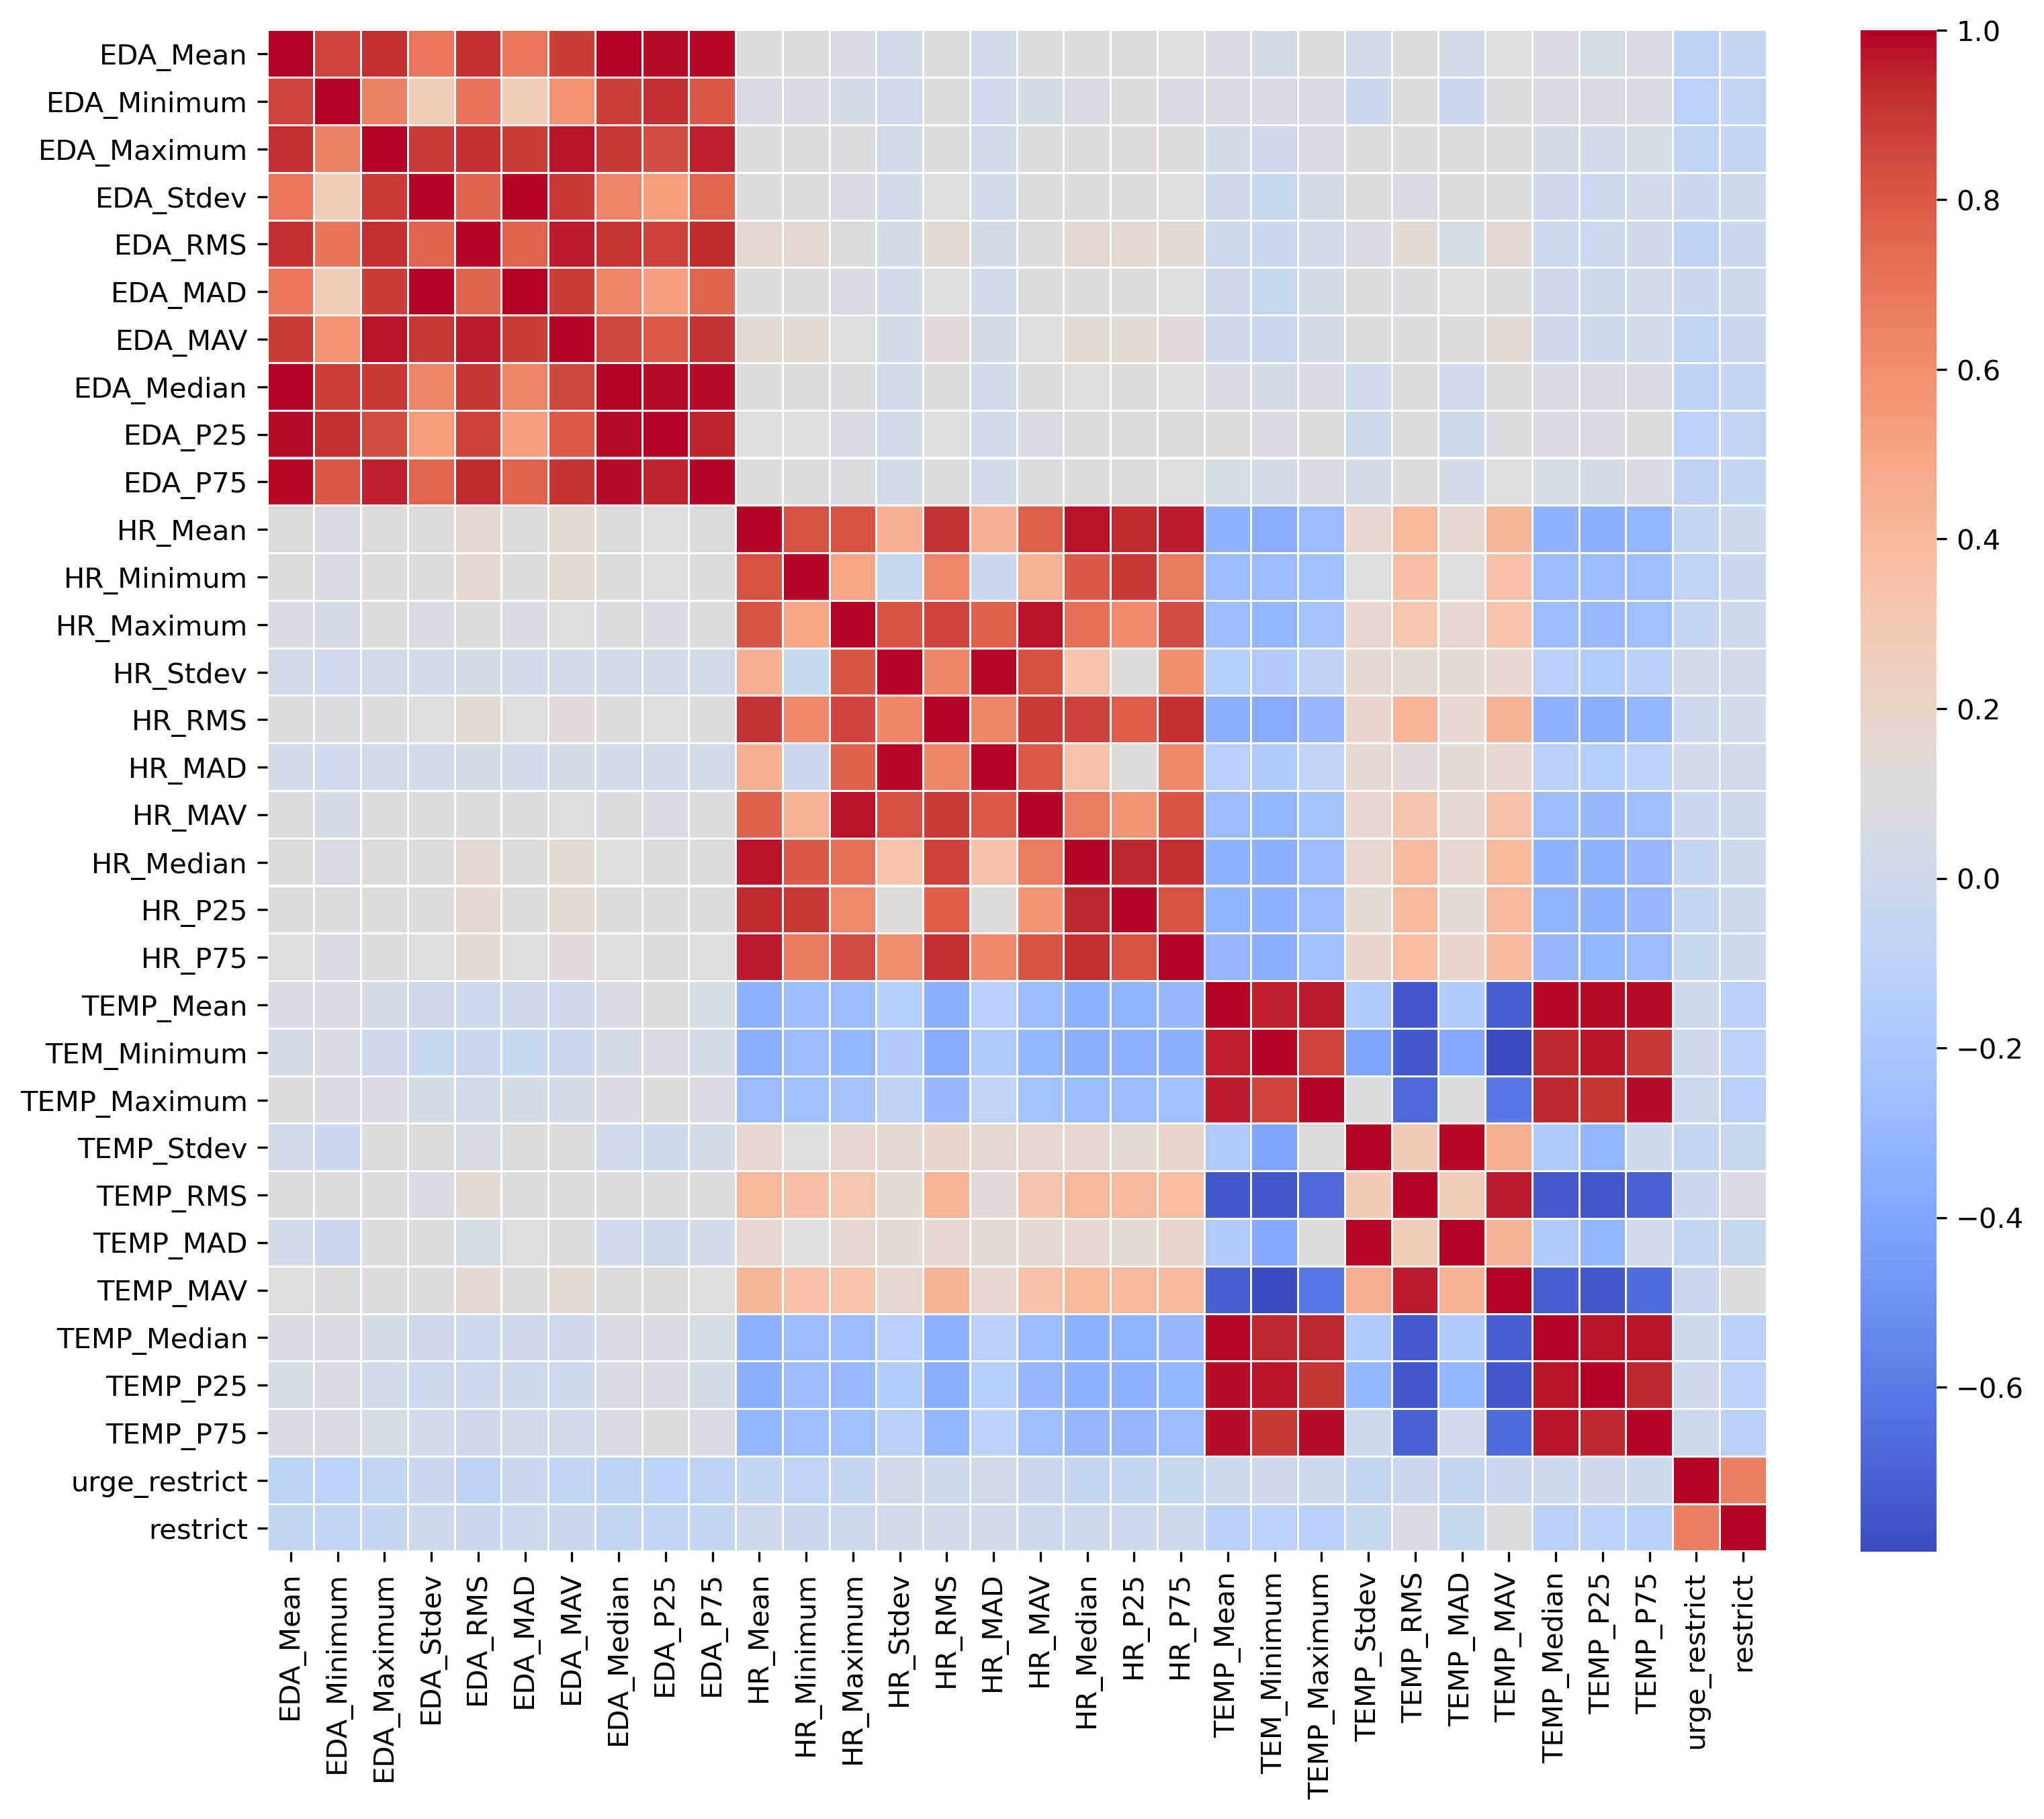

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_full = corrs.corr()

 
plt.figure(figsize=(12,10), dpi =300)
sns.heatmap(correlation_full,fmt=".2f", linewidth=.5, cmap = 'coolwarm')
plt.show()

In [127]:
#creating the dataset for predicting urge_restrict from physio alone
urgeData = raw.filter(['meanCenteredEDA_Mean', 'meanCenteredEDA_Minimum', 'meanCenteredEDA_Maximum', 'meanCenteredEDA_Stdev', 
                       'meanCenteredEDA_RMS', 'meanCenteredEDA_MAD', 'meanCenteredEDA_MAV', 'meanCenteredEDA_Median', 
                       'meanCenteredEDA_P25', 'meanCenteredEDA_P75', 'meanCenteredHR_Mean', 'meanCenteredHR_Minimum', 
                       'meanCenteredHR_Maximum', 'meanCenteredHR_Stdev', 'meanCenteredHR_RMS', 'meanCenteredHR_MAD', 
                       'meanCenteredHR_MAV', 'meanCenteredHR_Median', 'meanCenteredHR_P25', 'meanCenteredHR_P75', 
                       'meanCenteredTEMP_Mean', 'meanCenteredTEMP_Minimum', 'meanCenteredTEMP_Maximum', 'meanCenteredTEMP_Stdev', 
                       'meanCenteredTEMP_RMS', 'meanCenteredTEMP_MAD', 'meanCenteredTEMP_MAV', 'meanCenteredTEMP_Median', 
                       'meanCenteredTEMP_P25', 'meanCenteredTEMP_P75', 'urge_restrict'])

In [9]:
#creating the dataset for predicting restrict from physio alone
restrictData = raw.filter(['meanCenteredEDA_Mean', 'meanCenteredEDA_Minimum', 'meanCenteredEDA_Maximum', 'meanCenteredEDA_Stdev', 
                       'meanCenteredEDA_RMS', 'meanCenteredEDA_MAD', 'meanCenteredEDA_MAV', 'meanCenteredEDA_Median', 
                       'meanCenteredEDA_P25', 'meanCenteredEDA_P75', 'meanCenteredHR_Mean', 'meanCenteredHR_Minimum', 
                       'meanCenteredHR_Maximum', 'meanCenteredHR_Stdev', 'meanCenteredHR_RMS', 'meanCenteredHR_MAD', 
                       'meanCenteredHR_MAV', 'meanCenteredHR_Median', 'meanCenteredHR_P25', 'meanCenteredHR_P75', 
                       'meanCenteredTEMP_Mean', 'meanCenteredTEMP_Minimum', 'meanCenteredTEMP_Maximum', 'meanCenteredTEMP_Stdev', 
                       'meanCenteredTEMP_RMS', 'meanCenteredTEMP_MAD', 'meanCenteredTEMP_MAV', 'meanCenteredTEMP_Median', 
                       'meanCenteredTEMP_P25', 'meanCenteredTEMP_P75', 'restrict'])

In [10]:
urgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
np.any(np.isnan(urgeData['urge_restrict'])) #check that NAs exist - if false, we are good

restrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing
np.any(np.isnan(restrictData['restrict'])) #check that NAs exist - if false, we are good

False

In [11]:
#we want to randomly assort the rows in these dataframes now since they're clustered by participant
restrictDataShuffled = restrictData.sample(frac = 1) #shuffle restriction dataset
urgeDataShuffled = urgeData.sample(frac = 1) #shuffle urge dataset

In [12]:
#now what i want to do is reserve a portion of the data to test after the fact - the remaining data we'll do k-fold grid search cross validation
#we're going to split the data as follows: 
#80% of the data is going to be the train/test data for the model
#the remaining 20% will be held and we will use the trained/tested model to see how closely it predicts the 20% holdover set

from sklearn.model_selection import train_test_split

urgeX = urgeDataShuffled.drop(columns = {'urge_restrict'}) #drop urge_restrict from dataframe for the splitting
urgey = urgeDataShuffled.filter(['urge_restrict']) #make a dataframe containing only urge_restrict variable

restX = restrictDataShuffled.drop(columns = {'restrict'})
resty = restrictDataShuffled.filter(['restrict'])

In [13]:
urgeX_train, urgeX_test, urgey_train, urgey_test = train_test_split(urgeX, urgey, random_state=6,test_size=0.20) 
restX_train, restX_test, resty_train, resty_test = train_test_split(restX, resty, random_state=6,test_size=0.20) 
#we're sticking with 6 for random_state
#the test sets are what we are going to validate our models on later

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from numpy import arange

#we're going to start exclusively with the urge data for now, we'll circle back to the restrict data later 

urgeMod = ElasticNet(max_iter = 1000) 
urgecv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=6) #i still like 6, we're doing a 10-fold cross-validation repeating 3 times

In [15]:
from numpy import mean
from numpy import std
from numpy import absolute

def cross_validation(model, _X, _y, _cv):
    param_grid = {'alpha'     : [0.1,1,10,0.01],
                'l1_ratio'  :  np.arange(0.40,1.00,0.10),
                'tol'       : [0.0001,0.001] }
    _scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = _cv, scoring = _scoring, return_train_score = True, refit= 'neg_mean_absolute_error', n_jobs = -1)
    grid_search.fit(X = _X, y = _y,)
    print("Best parameters : {}".format(grid_search.best_params_))
    print("Best cross validation score: {:.2f}".format(grid_search.best_score_))
    print("Best estimator: {}".format(grid_search.best_estimator_))
    results = pd.DataFrame(grid_search.cv_results_)
    return results
           

In [109]:
urgecv_result = cross_validation(urgeMod, urgeX_train, urgey_train, urgecv)
urgecv_r2 = urgecv_result['mean_train_r2'].mean()
print("Train R2 = " + str(urgecv_r2))

Best parameters : {'alpha': 1, 'l1_ratio': 0.4, 'tol': 0.001}
Best cross validation score: -26.81
Best estimator: ElasticNet(alpha=1, l1_ratio=0.4, tol=0.001)
Train R2 = 0.040957225341871344


In [110]:
urgecv_r2med = urgecv_result['mean_train_r2'].median()
print("Train R2 = " + str(urgecv_r2med))

Train R2 = 0.04495040349108069


In [17]:
### now we build the final model for urge - we are using the optimal hyperparameters divulged through the grid search 
### to fit a final model and then test it on the hold-out test set
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error as mae 

urgeModTuned = ElasticNet(alpha = 1, l1_ratio = .4, tol = .001).fit(urgeX_train,urgey_train)
urgeyPred = urgeModTuned.predict(urgeX_test)
mae(urgey_test,urgeyPred) #MAE = 25.24

25.238151836179533

In [111]:
#trying restrict now 

restMod = ElasticNet(max_iter = 1000)
restcv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=6)
restcv_result = cross_validation(restMod, restX_train, resty_train, restcv)
restcv_r2 = restcv_result['mean_train_r2'].mean()
print("Train R2 = " + str(restcv_r2))

Best parameters : {'alpha': 0.01, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -29.36
Best estimator: ElasticNet(alpha=0.01, l1_ratio=0.8999999999999999)
Train R2 = 0.05276069843941667


C:\Users\Luis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 677983.6592962635, tolerance: 164.090367887324
  model = cd_fast.enet_coordinate_descent(


In [112]:
restcv_r2med = restcv_result['mean_train_r2'].median()
print("Train R2 = " + str(restcv_r2med))

Train R2 = 0.05681341874532231


In [19]:
restModTuned = ElasticNet(alpha = .01, l1_ratio = 0.8999999999999999, tol = 0.0001).fit(restX_train,resty_train)
restyPred = restModTuned.predict(restX_test)
#np.sqrt(mean_squared_error(resty_test,restyPred)) #MSE = 34.5
mae(resty_test,restyPred) #MAE = 30.72

C:\Users\Luis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 677983.6592962635, tolerance: 164.090367887324
  model = cd_fast.enet_coordinate_descent(


30.719619444429913

In [90]:
#we're gonna try with diagnoses now 

diag = pd.read_csv('ScreeningsR15-EDDiagnosticsSummary_DATA_2024-02-25_1408.csv') #dataframe containing diagnoses by ID
diag["PR"] = diag['record_id_73f3b8'] #making a column to match IDs
diag = diag.filter(['PR', 'currentdx1_ade7bc']) #i want to only merge the current general diagnoses and keep the ID variable
diagRaw = diag.merge(raw, how = 'inner', on = 'PR') #we made it 

diagRaw.head()

,PR,currentdx1_ade7bc,Unnamed..0,Time,HR_Mean,HR_Minimum,HR_Maximum,HR_Stdev,HR_RMS,HR_MAD,...,socialanx_meanCentered,socialanx_medCentered,sens_body_meanCentered,sens_body_medCentered,ridthoughts_meanCentered,ridthoughts_medCentered,memories_meanCentered,memories_medCentered,chewspit_meanCentered,chewspit_medCentered
0,PR003,1.0,117,58:00.0,93.129563,66.83,120.20,14.947826,94.321047,13.171499,...,9.483051,21.0,0.279661,-1.0,13.211864,3.0,10.110169,-0.5,0.0,0.0
1,PR003,1.0,116,28:00.0,67.698626,56.77,85.90,6.844791,68.043630,5.718079,...,10.483051,22.0,3.279661,2.0,7.211864,-3.0,-58.889831,-69.5,0.0,0.0
2,PR003,1.0,115,56:00.0,70.553065,55.93,93.38,9.837114,71.235269,7.708571,...,-11.516949,0.0,-1.720339,-3.0,12.211864,2.0,-58.889831,-69.5,0.0,0.0
3,PR003,1.0,114,56:00.0,90.937768,57.98,149.50,25.878040,94.546664,23.029055,...,-11.516949,0.0,-2.720339,-4.0,3.211864,-7.0,9.110169,-1.5,0.0,0.0
4,PR003,1.0,113,25:00.0,74.612836,57.92,93.05,10.477028,75.344527,8.849632,...,-11.516949,0.0,1.279661,0.0,17.211864,7.0,9.110169,-1.5,0.0,0.0


In [89]:
pd.set_option("display.max.rows", None)
idiographicDx = diagRaw[["PR","currentdx1_ade7bc"]]
idiographicDx.drop_duplicates(keep='first')

,PR,currentdx1_ade7bc
0,PR003,1.0
116,PR008,2.0
183,PR010,1.0
253,PR011,1.0
373,PR018,1.0
388,PR020,1.0
503,PR021,4.0
514,PR022,2.0
515,PR023,1.0
553,PR025,4.0


In [21]:
#coding values: 1 = AN, 2 = BN, 3 = BED, 4 = OSFED... there should  be no BED cases. 
#we will look at AN and BN specifically for now

bnmask = diagRaw['currentdx1_ade7bc'].values == 2
bn = diagRaw.loc[bnmask]

In [22]:
anmask = diagRaw['currentdx1_ade7bc'].values == 1
an = diagRaw.loc[anmask]

In [91]:
osfedmask = diagRaw['currentdx1_ade7bc'].values == 4
osfed = diagRaw.loc[osfedmask]


In [24]:
restrictFilter = raw.groupby('PR').mean('restrict') # anyone with a mean restriction endorsement >= 40 for this analysis

In [25]:
restrictFilter['urge_restrict']

PR
PR003    82.439655
PR008    44.030303
PR010     1.354839
PR011    46.403361
PR018    69.133333
PR020    29.780702
PR021    55.500000
PR022    81.000000
PR023    47.324324
PR025    59.346535
PR030    50.692308
PR032    91.238095
PR033    79.129032
PR037    53.138614
PR038    66.944444
PR039    15.253521
PR042    22.250000
PR044    29.944444
PR048    16.591549
PR073    10.379310
PR078    36.347826
PR079    40.965517
PR084    85.333333
PR085    72.461538
PR086    53.277778
PR096    38.363636
PR101    79.736842
PR102    90.571429
PR104    93.529412
PR106     7.000000
PR113    73.400000
PR115     7.900000
PR116    71.733333
PR117    33.636364
PR126    78.416667
PR128    56.300000
Name: urge_restrict, dtype: float64

In [26]:
restrictMask = restrictFilter['restrict'].values >= 40
restrictOnly = restrictFilter.loc[restrictMask]
restrictOnly = restrictOnly.rename_axis('PR').reset_index()
restIdList = restrictOnly['PR'].copy()

In [27]:
urgeMask = restrictFilter['urge_restrict'].values >= 40
urgeOnly = restrictFilter.loc[urgeMask]
urgeOnly = urgeOnly.rename_axis('PR').reset_index()
urgeIdList = urgeOnly['PR'].copy()

In [28]:
restIdList = restIdList.tolist()
urgeIdList = urgeIdList.tolist()

In [29]:
idList = restIdList + urgeIdList
idList = set(idList)
idList

{'PR003',
 'PR008',
 'PR011',
 'PR018',
 'PR021',
 'PR022',
 'PR023',
 'PR025',
 'PR030',
 'PR032',
 'PR033',
 'PR037',
 'PR038',
 'PR044',
 'PR078',
 'PR079',
 'PR084',
 'PR085',
 'PR086',
 'PR101',
 'PR102',
 'PR104',
 'PR113',
 'PR116',
 'PR117',
 'PR126',
 'PR128'}

In [30]:
restrictData = raw.loc[raw["PR"].isin(idList)]
len(restrictData['PR'].unique()) #27 cases in restriction analysis

27

In [31]:
restrictData

,Unnamed..0,Time,HR_Mean,HR_Minimum,HR_Maximum,HR_Stdev,HR_RMS,HR_MAD,HR_MAV,HR_Median,...,socialanx_medCentered,sens_body_meanCentered,sens_body_medCentered,ridthoughts_meanCentered,ridthoughts_medCentered,memories_meanCentered,memories_medCentered,chewspit_meanCentered,chewspit_medCentered,PR
0,117,58:00.0,93.129563,66.83,120.20,14.947826,94.321047,13.171499,120.20,94.55,...,21.0,0.279661,-1.0,13.211864,3.0,10.110169,-0.5,0.0,0.0,PR003
1,116,28:00.0,67.698626,56.77,85.90,6.844791,68.043630,5.718079,85.90,67.03,...,22.0,3.279661,2.0,7.211864,-3.0,-58.889831,-69.5,0.0,0.0,PR003
2,115,56:00.0,70.553065,55.93,93.38,9.837114,71.235269,7.708571,93.38,68.85,...,0.0,-1.720339,-3.0,12.211864,2.0,-58.889831,-69.5,0.0,0.0,PR003
3,114,56:00.0,90.937768,57.98,149.50,25.878040,94.546664,23.029055,149.50,84.10,...,0.0,-2.720339,-4.0,3.211864,-7.0,9.110169,-1.5,0.0,0.0,PR003
4,113,25:00.0,74.612836,57.92,93.05,10.477028,75.344527,8.849632,93.05,75.70,...,0.0,1.279661,0.0,17.211864,7.0,9.110169,-1.5,0.0,0.0,PR003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825,3,18:00.0,89.603111,67.65,105.58,11.408228,90.326137,9.806514,105.58,93.92,...,0.0,-15.258427,-16.0,10.022472,8.0,-1.314607,0.0,0.0,0.0,PR128
1826,4,14:00.0,86.490337,71.97,105.58,10.494469,87.124431,9.454118,105.58,84.92,...,0.0,-15.258427,-16.0,10.022472,8.0,-1.314607,0.0,0.0,0.0,PR128
1827,2,27:00.0,81.366835,59.48,111.25,10.247335,82.009304,8.262121,111.25,78.70,...,0.0,-15.258427,-16.0,-12.977528,-15.0,-1.314607,0.0,0.0,0.0,PR128
1828,1,53:00.0,123.766039,83.67,200.65,29.368184,127.201272,23.482926,200.65,116.10,...,0.0,-15.258427,-16.0,-12.977528,-15.0,-1.314607,0.0,0.0,0.0,PR128


In [32]:
restrictUrgeData = restrictData.filter(['meanCenteredEDA_Mean', 'meanCenteredEDA_Minimum', 'meanCenteredEDA_Maximum', 'meanCenteredEDA_Stdev', 
                       'meanCenteredEDA_RMS', 'meanCenteredEDA_MAD', 'meanCenteredEDA_MAV', 'meanCenteredEDA_Median', 
                       'meanCenteredEDA_P25', 'meanCenteredEDA_P75', 'meanCenteredHR_Mean', 'meanCenteredHR_Minimum', 
                       'meanCenteredHR_Maximum', 'meanCenteredHR_Stdev', 'meanCenteredHR_RMS', 'meanCenteredHR_MAD', 
                       'meanCenteredHR_MAV', 'meanCenteredHR_Median', 'meanCenteredHR_P25', 'meanCenteredHR_P75', 
                       'meanCenteredTEMP_Mean', 'meanCenteredTEMP_Minimum', 'meanCenteredTEMP_Maximum', 'meanCenteredTEMP_Stdev', 
                       'meanCenteredTEMP_RMS', 'meanCenteredTEMP_MAD', 'meanCenteredTEMP_MAV', 'meanCenteredTEMP_Median', 
                       'meanCenteredTEMP_P25', 'meanCenteredTEMP_P75', 'urge_restrict'])

restrictRestrictData = restrictData.filter(['meanCenteredEDA_Mean', 'meanCenteredEDA_Minimum', 'meanCenteredEDA_Maximum', 'meanCenteredEDA_Stdev', 
                       'meanCenteredEDA_RMS', 'meanCenteredEDA_MAD', 'meanCenteredEDA_MAV', 'meanCenteredEDA_Median', 
                       'meanCenteredEDA_P25', 'meanCenteredEDA_P75', 'meanCenteredHR_Mean', 'meanCenteredHR_Minimum', 
                       'meanCenteredHR_Maximum', 'meanCenteredHR_Stdev', 'meanCenteredHR_RMS', 'meanCenteredHR_MAD', 
                       'meanCenteredHR_MAV', 'meanCenteredHR_Median', 'meanCenteredHR_P25', 'meanCenteredHR_P75', 
                       'meanCenteredTEMP_Mean', 'meanCenteredTEMP_Minimum', 'meanCenteredTEMP_Maximum', 'meanCenteredTEMP_Stdev', 
                       'meanCenteredTEMP_RMS', 'meanCenteredTEMP_MAD', 'meanCenteredTEMP_MAV', 'meanCenteredTEMP_Median', 
                       'meanCenteredTEMP_P25', 'meanCenteredTEMP_P75', 'restrict'])

In [33]:
restrictUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
np.any(np.isnan(restrictUrgeData['urge_restrict'])) #check that NAs exist - if false, we are good

restrictRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing
np.any(np.isnan(restrictRestrictData['restrict']))#check that NAs exist - if false, we are good

False

In [34]:
#ANALYSIS FOR RESTRICTION SAMPLE

restUrgeDataShuffled = restrictUrgeData.sample(frac = 1) #shuffling BN data
restRestrictDataShuffled = restrictRestrictData.sample(frac = 1)

restUrgeX = restUrgeDataShuffled.drop(columns = {'urge_restrict'}) #drop urge_restrict from dataframe for the splitting
restUrgey = restUrgeDataShuffled.filter(['urge_restrict']) #make a dataframe containing only urge_restrict variable

restRestX = restRestrictDataShuffled.drop(columns = {'restrict'})
restResty = restRestrictDataShuffled.filter(['restrict'])

restUrgeX_train, restUrgeX_test, restUrgey_train, restUrgey_test = train_test_split(restUrgeX, restUrgey, random_state=6,test_size=0.20) 
restRestX_train, restRestX_test, restResty_train, restResty_test = train_test_split(restRestX, restResty, random_state=6,test_size=0.20) 

In [35]:
restUrgeMod = ElasticNet(max_iter = 1000) #we're starting with default parameters - alpha=1.0, l1_ratio=0.5, increased iterations to allow convergence
resturgecv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=6) 

resturgecv_result = cross_validation(restUrgeMod, restUrgeX_train, restUrgey_train, resturgecv)
print(resturgecv_result) 
resturgecv_r2 = resturgecv_result['mean_train_r2'].mean()
print("Train R2 = " + str(resturgecv_r2)) #R2 = .04

Best parameters : {'alpha': 0.01, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -19.18
Best estimator: ElasticNet(alpha=0.01, l1_ratio=0.8999999999999999)
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.024222  5.196995e-03         0.005405    1.020833e-03         0.1   
1        0.028225  2.715913e-03         0.006606    1.020815e-03         0.1   
2        0.020819  3.062351e-03         0.006606    1.626069e-03         0.1   
3        0.026024  1.674738e-03         0.005405    4.905243e-04         0.1   
4        0.024022  4.385620e-03         0.007206    2.137266e-03         0.1   
5        0.025223  2.229227e-03         0.006406    1.357668e-03         0.1   
6        0.022821  2.715344e-03         0.005605    8.007527e-04         0.1   
7        0.023021  1.096497e-03         0.005205    1.167561e-03         0.1   
8        0.019618  1.201185e-03         0.005605    4.902518e-04         0.1   
9        0.0220

C:\Users\Luis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 265180.5606071071, tolerance: 59.97885165369651
  model = cd_fast.enet_coordinate_descent(


In [36]:
resturgeModTuned = ElasticNet(alpha = 10, l1_ratio = 0.4, tol = 0.001).fit(restUrgeX_train,restUrgey_train)
resturgeyPred = resturgeModTuned.predict(restUrgeX_test)
mae(restUrgey_test,resturgeyPred) #MAE = 19.70

20.207860364588154

In [37]:
restRestMod = ElasticNet(max_iter = 1000) 
restrestcv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=6) 

restrestcv_result = cross_validation(restRestMod, restRestX_train, restResty_train, restrestcv)
print(restrestcv_result) 
restrestcv_r2 = restrestcv_result['mean_train_r2'].mean()
print("Train R2 = " + str(restrestcv_r2)) #R2 = .08

Best parameters : {'alpha': 1, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -19.40
Best estimator: ElasticNet(alpha=1, l1_ratio=0.4)
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.025823  2.229133e-03         0.006006    1.096497e-03         0.1   
1        0.027224  2.996218e-03         0.006006    1.096410e-03         0.1   
2        0.019217  2.640358e-03         0.005605    1.020843e-03         0.1   
3        0.026824  3.658333e-03         0.004604    4.903298e-04         0.1   
4        0.022620  2.499990e-03         0.005605    1.744615e-03         0.1   
5        0.025023  3.101394e-03         0.005205    7.490164e-04         0.1   
6        0.021019  3.409117e-03         0.005805    1.167308e-03         0.1   
7        0.024422  3.614236e-03         0.006006    8.952155e-04         0.1   
8        0.018417  1.020403e-03         0.004604    4.905244e-04         0.1   
9        0.024222  1.471197e-03         0.008207   

In [38]:
restrestModTuned = ElasticNet(alpha = .1, l1_ratio = 0.8999999999999999, tol = 0.0001).fit(restRestX_train,restResty_train)
restrestyPred = restrestModTuned.predict(restRestX_test)
mae(restResty_test,restrestyPred) #MAE = 19.85

C:\Users\Luis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96115.79643037805, tolerance: 61.911282352941186
  model = cd_fast.enet_coordinate_descent(


18.395948862355976

In [39]:
#BN subsets
bnUrgeData = bn.filter(['meanCenteredEDA_Mean', 'meanCenteredEDA_Minimum', 'meanCenteredEDA_Maximum', 'meanCenteredEDA_Stdev', 
                       'meanCenteredEDA_RMS', 'meanCenteredEDA_MAD', 'meanCenteredEDA_MAV', 'meanCenteredEDA_Median', 
                       'meanCenteredEDA_P25', 'meanCenteredEDA_P75', 'meanCenteredHR_Mean', 'meanCenteredHR_Minimum', 
                       'meanCenteredHR_Maximum', 'meanCenteredHR_Stdev', 'meanCenteredHR_RMS', 'meanCenteredHR_MAD', 
                       'meanCenteredHR_MAV', 'meanCenteredHR_Median', 'meanCenteredHR_P25', 'meanCenteredHR_P75', 
                       'meanCenteredTEMP_Mean', 'meanCenteredTEMP_Minimum', 'meanCenteredTEMP_Maximum', 'meanCenteredTEMP_Stdev', 
                       'meanCenteredTEMP_RMS', 'meanCenteredTEMP_MAD', 'meanCenteredTEMP_MAV', 'meanCenteredTEMP_Median', 
                       'meanCenteredTEMP_P25', 'meanCenteredTEMP_P75', 'urge_restrict'])

bnRestrictData = bn.filter(['meanCenteredEDA_Mean', 'meanCenteredEDA_Minimum', 'meanCenteredEDA_Maximum', 'meanCenteredEDA_Stdev', 
                       'meanCenteredEDA_RMS', 'meanCenteredEDA_MAD', 'meanCenteredEDA_MAV', 'meanCenteredEDA_Median', 
                       'meanCenteredEDA_P25', 'meanCenteredEDA_P75', 'meanCenteredHR_Mean', 'meanCenteredHR_Minimum', 
                       'meanCenteredHR_Maximum', 'meanCenteredHR_Stdev', 'meanCenteredHR_RMS', 'meanCenteredHR_MAD', 
                       'meanCenteredHR_MAV', 'meanCenteredHR_Median', 'meanCenteredHR_P25', 'meanCenteredHR_P75', 
                       'meanCenteredTEMP_Mean', 'meanCenteredTEMP_Minimum', 'meanCenteredTEMP_Maximum', 'meanCenteredTEMP_Stdev', 
                       'meanCenteredTEMP_RMS', 'meanCenteredTEMP_MAD', 'meanCenteredTEMP_MAV', 'meanCenteredTEMP_Median', 
                       'meanCenteredTEMP_P25', 'meanCenteredTEMP_P75', 'restrict'])

bnUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
np.any(np.isnan(bnUrgeData['urge_restrict'])) #check that NAs exist - if false, we are good

bnRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing
np.any(np.isnan(bnRestrictData['restrict']))#check that NAs exist - if false, we are good

#AN subsets
anUrgeData = an.filter(['meanCenteredEDA_Mean', 'meanCenteredEDA_Minimum', 'meanCenteredEDA_Maximum', 'meanCenteredEDA_Stdev', 
                       'meanCenteredEDA_RMS', 'meanCenteredEDA_MAD', 'meanCenteredEDA_MAV', 'meanCenteredEDA_Median', 
                       'meanCenteredEDA_P25', 'meanCenteredEDA_P75', 'meanCenteredHR_Mean', 'meanCenteredHR_Minimum', 
                       'meanCenteredHR_Maximum', 'meanCenteredHR_Stdev', 'meanCenteredHR_RMS', 'meanCenteredHR_MAD', 
                       'meanCenteredHR_MAV', 'meanCenteredHR_Median', 'meanCenteredHR_P25', 'meanCenteredHR_P75', 
                       'meanCenteredTEMP_Mean', 'meanCenteredTEMP_Minimum', 'meanCenteredTEMP_Maximum', 'meanCenteredTEMP_Stdev', 
                       'meanCenteredTEMP_RMS', 'meanCenteredTEMP_MAD', 'meanCenteredTEMP_MAV', 'meanCenteredTEMP_Median', 
                       'meanCenteredTEMP_P25', 'meanCenteredTEMP_P75', 'urge_restrict'])

anRestrictData = an.filter(['meanCenteredEDA_Mean', 'meanCenteredEDA_Minimum', 'meanCenteredEDA_Maximum', 'meanCenteredEDA_Stdev', 
                       'meanCenteredEDA_RMS', 'meanCenteredEDA_MAD', 'meanCenteredEDA_MAV', 'meanCenteredEDA_Median', 
                       'meanCenteredEDA_P25', 'meanCenteredEDA_P75', 'meanCenteredHR_Mean', 'meanCenteredHR_Minimum', 
                       'meanCenteredHR_Maximum', 'meanCenteredHR_Stdev', 'meanCenteredHR_RMS', 'meanCenteredHR_MAD', 
                       'meanCenteredHR_MAV', 'meanCenteredHR_Median', 'meanCenteredHR_P25', 'meanCenteredHR_P75', 
                       'meanCenteredTEMP_Mean', 'meanCenteredTEMP_Minimum', 'meanCenteredTEMP_Maximum', 'meanCenteredTEMP_Stdev', 
                       'meanCenteredTEMP_RMS', 'meanCenteredTEMP_MAD', 'meanCenteredTEMP_MAV', 'meanCenteredTEMP_Median', 
                       'meanCenteredTEMP_P25', 'meanCenteredTEMP_P75', 'restrict'])

anUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
np.any(np.isnan(anUrgeData['urge_restrict'])) #check that NAs exist - if false, we are good

anRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing
np.any(np.isnan(anRestrictData['restrict']))#check that NAs exist - if false, we are good

#OSFED subsets
osfedUrgeData = bn.filter(['meanCenteredEDA_Mean', 'meanCenteredEDA_Minimum', 'meanCenteredEDA_Maximum', 'meanCenteredEDA_Stdev', 
                       'meanCenteredEDA_RMS', 'meanCenteredEDA_MAD', 'meanCenteredEDA_MAV', 'meanCenteredEDA_Median', 
                       'meanCenteredEDA_P25', 'meanCenteredEDA_P75', 'meanCenteredHR_Mean', 'meanCenteredHR_Minimum', 
                       'meanCenteredHR_Maximum', 'meanCenteredHR_Stdev', 'meanCenteredHR_RMS', 'meanCenteredHR_MAD', 
                       'meanCenteredHR_MAV', 'meanCenteredHR_Median', 'meanCenteredHR_P25', 'meanCenteredHR_P75', 
                       'meanCenteredTEMP_Mean', 'meanCenteredTEMP_Minimum', 'meanCenteredTEMP_Maximum', 'meanCenteredTEMP_Stdev', 
                       'meanCenteredTEMP_RMS', 'meanCenteredTEMP_MAD', 'meanCenteredTEMP_MAV', 'meanCenteredTEMP_Median', 
                       'meanCenteredTEMP_P25', 'meanCenteredTEMP_P75', 'urge_restrict'])

osfedRestrictData = bn.filter(['meanCenteredEDA_Mean', 'meanCenteredEDA_Minimum', 'meanCenteredEDA_Maximum', 'meanCenteredEDA_Stdev', 
                       'meanCenteredEDA_RMS', 'meanCenteredEDA_MAD', 'meanCenteredEDA_MAV', 'meanCenteredEDA_Median', 
                       'meanCenteredEDA_P25', 'meanCenteredEDA_P75', 'meanCenteredHR_Mean', 'meanCenteredHR_Minimum', 
                       'meanCenteredHR_Maximum', 'meanCenteredHR_Stdev', 'meanCenteredHR_RMS', 'meanCenteredHR_MAD', 
                       'meanCenteredHR_MAV', 'meanCenteredHR_Median', 'meanCenteredHR_P25', 'meanCenteredHR_P75', 
                       'meanCenteredTEMP_Mean', 'meanCenteredTEMP_Minimum', 'meanCenteredTEMP_Maximum', 'meanCenteredTEMP_Stdev', 
                       'meanCenteredTEMP_RMS', 'meanCenteredTEMP_MAD', 'meanCenteredTEMP_MAV', 'meanCenteredTEMP_Median', 
                       'meanCenteredTEMP_P25', 'meanCenteredTEMP_P75', 'restrict'])

osfedUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
np.any(np.isnan(osfedUrgeData['urge_restrict'])) #check that NAs exist - if false, we are good

osfedRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing
np.any(np.isnan(osfedRestrictData['restrict']))#check that NAs exist - if false, we are good

False

In [40]:
#ANALYSIS FOR BN

bnUrgeDataShuffled = bnUrgeData.sample(frac = 1) #shuffling BN data
bnRestrictDataShuffled = bnRestrictData.sample(frac = 1)

bnUrgeX = bnUrgeDataShuffled.drop(columns = {'urge_restrict'}) #drop urge_restrict from dataframe for the splitting
bnUrgey = bnUrgeDataShuffled.filter(['urge_restrict']) #make a dataframe containing only urge_restrict variable

bnRestX = bnRestrictDataShuffled.drop(columns = {'restrict'})
bnResty = bnRestrictDataShuffled.filter(['restrict'])

bnUrgeX_train, bnUrgeX_test, bnUrgey_train, bnUrgey_test = train_test_split(bnUrgeX, bnUrgey, random_state=6,test_size=0.20) 
bnRestX_train, bnRestX_test, bnResty_train, bnResty_test = train_test_split(bnRestX, bnResty, random_state=6,test_size=0.20) 

In [41]:
bnUrgeMod = ElasticNet(max_iter = 1000) #we're starting with default parameters - alpha=1.0, l1_ratio=0.5, increased iterations to allow convergence
bnurgecv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=6) 

bnurgecv_result = cross_validation(bnUrgeMod, bnUrgeX_train, bnUrgey_train, bnurgecv)
print(bnurgecv_result) #yeah that's still not great - avg error of 24 and still a poor R2
bnurgecv_r2 = bnurgecv_result['mean_train_r2'].mean()
print("Train R2 = " + str(bnurgecv_r2)) #R2 = .23

Best parameters : {'alpha': 10, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -27.46
Best estimator: ElasticNet(alpha=10, l1_ratio=0.4)
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.009008  6.329375e-04         0.004405    4.904465e-04         0.1   
1        0.009608  1.021030e-03         0.005005    1.096193e-03         0.1   
2        0.009809  2.229090e-03         0.004804    4.002333e-04         0.1   
3        0.009609  1.020890e-03         0.005005    6.330129e-04         0.1   
4        0.009609  1.020712e-03         0.005805    1.940835e-03         0.1   
5        0.011611  2.873272e-03         0.004604    4.901935e-04         0.1   
6        0.010009  1.266026e-03         0.004805    4.004241e-04         0.1   
7        0.010209  7.492586e-04         0.004604    4.902130e-04         0.1   
8        0.009809  1.167128e-03         0.005005    2.431402e-07         0.1   
9        0.009609  1.201010e-03         0.005805 

In [42]:
bnurgeModTuned = ElasticNet(alpha = 1, l1_ratio = 0.4, tol = 0.0001).fit(bnUrgeX_train,bnUrgey_train)
bnurgeyPred = bnurgeModTuned.predict(bnUrgeX_test)
mae(bnUrgey_test,bnurgeyPred) #MAE = 27.48

27.01745643948547

In [43]:
bnRestMod = ElasticNet(max_iter = 1000) #we're starting with default parameters - alpha=1.0, l1_ratio=0.5, increased iterations to allow convergence
bnrestcv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=6) 

bnrestcv_result = cross_validation(bnRestMod, bnRestX_train, bnResty_train, bnrestcv)
print(bnrestcv_result) 
bnrestcv_r2 = bnrestcv_result['mean_train_r2'].mean()
print("Train R2 = " + str(bnrestcv_r2)) #R2 = .35

Best parameters : {'alpha': 1, 'l1_ratio': 0.4, 'tol': 0.001}
Best cross validation score: -26.01
Best estimator: ElasticNet(alpha=1, l1_ratio=0.4, tol=0.001)
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.009295  1.038985e-03         0.006806    3.603101e-03         0.1   
1        0.010209  4.002810e-04         0.008808    3.922786e-03         0.1   
2        0.013012  6.071693e-03         0.008407    5.752954e-03         0.1   
3        0.009008  2.780415e-07         0.005004    6.328621e-04         0.1   
4        0.011610  3.009572e-03         0.005805    1.167300e-03         0.1   
5        0.010610  2.730057e-03         0.005605    8.006931e-04         0.1   
6        0.009809  1.721909e-03         0.004804    4.003525e-04         0.1   
7        0.009609  1.020862e-03         0.005204    4.004719e-04         0.1   
8        0.008007  1.096541e-03         0.005204    9.809416e-04         0.1   
9        0.010610  1.961392e-03         0

In [44]:
bnrestModTuned = ElasticNet(alpha = 1, l1_ratio = 0.4, tol = 0.001).fit(bnRestX_train,bnResty_train)
bnrestyPred = bnrestModTuned.predict(bnRestX_test)
mae(bnResty_test,bnrestyPred) #MAE = 25.71

27.843791575972503

In [45]:
#ANALYSIS FOR AN

anUrgeDataShuffled = anUrgeData.sample(frac = 1) #shuffling BN data
anRestrictDataShuffled = bnRestrictData.sample(frac = 1)

anUrgeX = anUrgeDataShuffled.drop(columns = {'urge_restrict'}) #drop urge_restrict from dataframe for the splitting
anUrgey = anUrgeDataShuffled.filter(['urge_restrict']) #make a dataframe containing only urge_restrict variable

anRestX = anRestrictDataShuffled.drop(columns = {'restrict'})
anResty = anRestrictDataShuffled.filter(['restrict'])

anUrgeX_train, anUrgeX_test, anUrgey_train, anUrgey_test = train_test_split(anUrgeX, anUrgey, random_state=6,test_size=0.20) 
anRestX_train, anRestX_test, anResty_train, anResty_test = train_test_split(anRestX, anResty, random_state=6,test_size=0.20) 

In [46]:
anUrgeMod = ElasticNet(max_iter = 1000) #we're starting with default parameters - alpha=1.0, l1_ratio=0.5
anurgecv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=6) 

anurgecv_result = cross_validation(anUrgeMod, anUrgeX_train, anUrgey_train, anurgecv)
print(anurgecv_result) 
anurgecv_r2 = anurgecv_result['mean_train_r2'].mean()
print("Train R2 = " + str(anurgecv_r2)) #R2 = .13

Best parameters : {'alpha': 0.1, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -24.64
Best estimator: ElasticNet(alpha=0.1, l1_ratio=0.4)
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.017016  1.898787e-03         0.005005    6.330883e-04         0.1   
1        0.016215  1.941031e-03         0.005005    6.329375e-04         0.1   
2        0.016415  1.357760e-03         0.004204    4.001141e-04         0.1   
3        0.017015  2.831223e-03         0.005205    4.003525e-04         0.1   
4        0.018017  1.674595e-03         0.006606    2.729994e-03         0.1   
5        0.016215  2.788420e-03         0.005205    1.167243e-03         0.1   
6        0.016415  2.060663e-03         0.005205    9.811071e-04         0.1   
7        0.015413  2.061167e-03         0.005806    7.492459e-04         0.1   
8        0.016615  2.500529e-03         0.005004    6.332392e-04         0.1   
9        0.014814  2.317249e-03         0.00540

C:\Users\Luis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3033.0413569353404, tolerance: 65.96646073369564
  model = cd_fast.enet_coordinate_descent(


In [47]:
anurgeModTuned = ElasticNet(alpha = 1, l1_ratio = 0.4, tol = 0.0001).fit(anUrgeX_train,anUrgey_train)
anurgeyPred = anurgeModTuned.predict(anUrgeX_test)
mae(anUrgey_test,anurgeyPred) #MAE = 25.67

25.4805519291894

In [48]:
anRestMod = ElasticNet(max_iter = 1000) #we're starting with default parameters - alpha=1.0, l1_ratio=0.5, increased iterations to allow convergence
anrestcv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=6) 

anrestcv_result = cross_validation(anRestMod, anRestX_train, anResty_train, anrestcv)
print(anrestcv_result)
anrestcv_r2 = anrestcv_result['mean_train_r2'].mean()
print("Train R2 = " + str(anrestcv_r2)) #R2 = .34

Best parameters : {'alpha': 1, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -26.87
Best estimator: ElasticNet(alpha=1, l1_ratio=0.4)
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.010610  8.006812e-04         0.005005    6.329375e-04         0.1   
1        0.011210  4.004003e-04         0.008007    1.899039e-03         0.1   
2        0.010409  2.061038e-03         0.007407    2.419007e-03         0.1   
3        0.012011  2.861023e-07         0.010610    3.723565e-03         0.1   
4        0.010410  1.020834e-03         0.008408    3.139709e-03         0.1   
5        0.012611  1.626298e-03         0.007006    2.686126e-03         0.1   
6        0.011410  1.357760e-03         0.006807    1.722059e-03         0.1   
7        0.010610  8.009672e-04         0.006806    3.126841e-03         0.1   
8        0.009809  1.167259e-03         0.005605    8.005977e-04         0.1   
9        0.012612  2.579135e-03         0.007006   

In [49]:
anrestModTuned = ElasticNet(alpha = 1, l1_ratio = 0.4, tol = 0.001).fit(anRestX_train,anResty_train)
anrestyPred = anrestModTuned.predict(anRestX_test)
mae(anResty_test,anrestyPred) #MAE = 29.26

25.75124786110005

In [92]:
#ATYPICAL AN ANALYSIS

osfedUrgeDataShuffled = osfedUrgeData.sample(frac = 1) #shuffling BN data
osfedRestrictDataShuffled = osfedRestrictData.sample(frac = 1)

osfedUrgeX = osfedUrgeDataShuffled.drop(columns = {'urge_restrict'}) #drop urge_restrict from dataframe for the splitting
osfedUrgey = osfedUrgeDataShuffled.filter(['urge_restrict']) #make a dataframe containing only urge_restrict variable

osfedRestX = osfedRestrictDataShuffled.drop(columns = {'restrict'})
osfedResty = osfedRestrictDataShuffled.filter(['restrict'])

osfedUrgeX_train, osfedUrgeX_test, osfedUrgey_train, osfedUrgey_test = train_test_split(osfedUrgeX, osfedUrgey, random_state=6,test_size=0.20) 
osfedRestX_train, osfedRestX_test, osfedResty_train, osfedResty_test = train_test_split(osfedRestX, osfedResty, random_state=6,test_size=0.20) 

In [96]:
osfedUrgeMod = ElasticNet(max_iter = 1000) #we're starting with default parameters - alpha=1.0, l1_ratio=0.5, increased iterations to allow convergence
osfedurgecv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=6) 

osfedurgecv_result = cross_validation(osfedUrgeMod, osfedUrgeX_train, osfedUrgey_train, osfedurgecv)
print(osfedurgecv_result) 
osfedurgecv_r2 = osfedurgecv_result['mean_train_r2'].mean()
print("Train R2 = " + str(osfedurgecv_r2)) #R2 = .20

Best parameters : {'alpha': 1, 'l1_ratio': 0.4, 'tol': 0.001}
Best cross validation score: -27.34
Best estimator: ElasticNet(alpha=1, l1_ratio=0.4, tol=0.001)
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.009408  1.497905e-03         0.004604    4.904271e-04         0.1   
1        0.010008  8.952154e-04         0.008208    3.190422e-03         0.1   
2        0.008408  1.201018e-03         0.005205    4.002097e-04         0.1   
3        0.008808  7.490038e-04         0.005005    9.536743e-08         0.1   
4        0.007807  4.002335e-04         0.004804    4.003763e-04         0.1   
5        0.008608  4.905633e-04         0.004604    4.906998e-04         0.1   
6        0.008007  1.550312e-03         0.004804    4.005671e-04         0.1   
7        0.008207  4.003049e-04         0.004604    4.902519e-04         0.1   
8        0.009008  1.415527e-03         0.005205    1.167275e-03         0.1   
9        0.008007  8.950555e-04         0

In [97]:
osfedurgeModTuned = ElasticNet(alpha = 1, l1_ratio = 0.4, tol = 0.0001).fit(osfedUrgeX_train,osfedUrgey_train)
osfedurgeyPred = osfedurgeModTuned.predict(osfedUrgeX_test)
mae(osfedUrgey_test,osfedurgeyPred) #MAE = 26.35

C:\Users\Luis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157.29670138354413, tolerance: 21.507324210526313
  model = cd_fast.enet_coordinate_descent(


23.759246096671447

In [98]:
osfedRestMod = ElasticNet(max_iter = 1000) #we're starting with default parameters - alpha=1.0, l1_ratio=0.5, increased iterations to allow convergence
osfedrestcv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=6) 

osfedrestcv_result = cross_validation(osfedRestMod, osfedRestX_train, osfedResty_train, osfedrestcv)
print(osfedrestcv_result)
osfedrestcv_r2 = osfedrestcv_result['mean_train_r2'].mean()
print("Train R2 = " + str(osfedrestcv_r2)) #R2 = .33

Best parameters : {'alpha': 0.1, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -26.22
Best estimator: ElasticNet(alpha=0.1, l1_ratio=0.4)
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.009008  1.266478e-03         0.005405    1.020347e-03         0.1   
1        0.009609  1.357661e-03         0.008808    1.940825e-03         0.1   
2        0.008408  4.901739e-04         0.004604    8.006573e-04         0.1   
3        0.009008  6.328621e-04         0.004004    3.015783e-07         0.1   
4        0.008208  1.167234e-03         0.004804    4.003287e-04         0.1   
5        0.008408  1.020506e-03         0.004804    4.002095e-04         0.1   
6        0.007807  4.003525e-04         0.004404    4.904660e-04         0.1   
7        0.008808  1.167202e-03         0.005004    1.096498e-03         0.1   
8        0.008207  7.491057e-04         0.004604    4.901938e-04         0.1   
9        0.008808  1.167365e-03         0.00460

C:\Users\Luis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64836.235154137816, tolerance: 23.305779057591618
  model = cd_fast.enet_coordinate_descent(


In [100]:
osfedrestModTuned = ElasticNet(alpha = .1, l1_ratio = 0.4, tol = 0.0001).fit(osfedRestX_train,osfedResty_train)
osfedrestyPred = anrestModTuned.predict(osfedRestX_test)
mae(osfedResty_test,osfedrestyPred) #MAE = 27.82

C:\Users\Luis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64836.235154137816, tolerance: 23.305779057591618
  model = cd_fast.enet_coordinate_descent(


24.55833414989048

In [55]:
an['restrict'].mean()
an['restrict'].min()
an['restrict'].max()
an['restrict'].std()
len(an['PR'].unique())

16

In [56]:
bn['restrict'].mean()
bn['restrict'].min()
bn['restrict'].max()
bn['restrict'].std()
len(bn['PR'].unique())

9

In [104]:
osfed['restrict'].mean()
osfed['restrict'].min()
osfed['restrict'].max()
osfed['restrict'].std()
len(osfed['PR'].unique())

11

In [58]:
an['urge_restrict'].mean()
an['urge_restrict'].min()
an['urge_restrict'].max()
an['urge_restrict'].std()

30.25487788506278

In [107]:
osfed['urge_restrict'].mean()
osfed['urge_restrict'].min()
osfed['urge_restrict'].max()
osfed['urge_restrict'].std()

27.372893179639004

In [60]:
#need the dataset to include participant IDS for the idiographic analyses
urgeDatawid = raw.filter(['meanCenteredEDA_Mean', 'meanCenteredEDA_Minimum', 'meanCenteredEDA_Maximum', 'meanCenteredEDA_Stdev', 
                       'meanCenteredEDA_RMS', 'meanCenteredEDA_MAD', 'meanCenteredEDA_MAV', 'meanCenteredEDA_Median', 
                       'meanCenteredEDA_P25', 'meanCenteredEDA_P75', 'meanCenteredHR_Mean', 'meanCenteredHR_Minimum', 
                       'meanCenteredHR_Maximum', 'meanCenteredHR_Stdev', 'meanCenteredHR_RMS', 'meanCenteredHR_MAD', 
                       'meanCenteredHR_MAV', 'meanCenteredHR_Median', 'meanCenteredHR_P25', 'meanCenteredHR_P75', 
                       'meanCenteredTEMP_Mean', 'meanCenteredTEMP_Minimum', 'meanCenteredTEMP_Maximum', 'meanCenteredTEMP_Stdev', 
                       'meanCenteredTEMP_RMS', 'meanCenteredTEMP_MAD', 'meanCenteredTEMP_MAV', 'meanCenteredTEMP_Median', 
                       'meanCenteredTEMP_P25', 'meanCenteredTEMP_P75', 'urge_restrict', 'PR'])

restrictDatawid = raw.filter(['meanCenteredEDA_Mean', 'meanCenteredEDA_Minimum', 'meanCenteredEDA_Maximum', 'meanCenteredEDA_Stdev', 
                       'meanCenteredEDA_RMS', 'meanCenteredEDA_MAD', 'meanCenteredEDA_MAV', 'meanCenteredEDA_Median', 
                       'meanCenteredEDA_P25', 'meanCenteredEDA_P75', 'meanCenteredHR_Mean', 'meanCenteredHR_Minimum', 
                       'meanCenteredHR_Maximum', 'meanCenteredHR_Stdev', 'meanCenteredHR_RMS', 'meanCenteredHR_MAD', 
                       'meanCenteredHR_MAV', 'meanCenteredHR_Median', 'meanCenteredHR_P25', 'meanCenteredHR_P75', 
                       'meanCenteredTEMP_Mean', 'meanCenteredTEMP_Minimum', 'meanCenteredTEMP_Maximum', 'meanCenteredTEMP_Stdev', 
                       'meanCenteredTEMP_RMS', 'meanCenteredTEMP_MAD', 'meanCenteredTEMP_MAV', 'meanCenteredTEMP_Median', 
                       'meanCenteredTEMP_P25', 'meanCenteredTEMP_P75', 'restrict', 'PR'])

In [63]:
idDescriptives = urgeDatawid.groupby("PR", as_index = False).agg(
                      {'urge_restrict':['mean', 'std']})
idDescriptives

PR urge_restrict           
                   mean        std
0   PR003     82.439655  10.342221
1   PR008     44.030303  42.203161
2   PR010      1.354839   5.001956
3   PR011     46.403361  20.773728
4   PR018     69.133333   9.101544
5   PR020     29.780702  19.956927
6   PR021     55.500000  33.110421
7   PR022     81.000000        NaN
8   PR023     47.324324  22.378132
9   PR025     59.346535  10.410990
10  PR030     50.692308  11.884055
11  PR032     91.238095   5.830155
12  PR033     79.129032  16.485836
13  PR037     53.138614  20.990012
14  PR038     66.944444  12.873072
15  PR039     15.253521  15.271559
16  PR042     22.250000  20.471402
17  PR044     29.944444  16.874876
18  PR048     16.591549  18.636046
19  PR073     10.379310  27.423157
20  PR078     36.347826   9.023246
21  PR079     40.965517  16.764083
22  PR084     85.333333   4.676181
23  PR085     72.461538  15.570353
24  PR086     53.277778  23.007789
25  PR096     38.363636  34.791587
26  PR101     79.736842  12.339724
27  PR102     90.571429   3.807526
28  PR104     93.529412   9.388275
29  PR106      7.000000   2.549510
30  PR113     73.400000   2.880972
31  PR115      7.900000   7.866243
32  PR116     71.733333  13.688875
33  PR117     33.636364  19.412742
34  PR126     78.416667  14.417077
35  PR128     56.300000  15.674983

In [65]:
idDescriptivesRest = restrictDatawid.groupby("PR", as_index = False).agg(
                      {'restrict':['mean', 'std']})
idDescriptivesRest

PR   restrict           
                mean        std
0   PR003  84.543103   6.960000
1   PR008  80.333333  17.049551
2   PR010   1.107692   3.976977
3   PR011  77.672269   6.320681
4   PR018  29.533333  24.482841
5   PR020   0.114035   0.606145
6   PR021  71.666667  26.755685
7   PR022  84.000000        NaN
8   PR023  48.324324  22.905669
9   PR025  63.413462  12.243176
10  PR030  24.153846  11.795805
11  PR032  37.047619  25.200612
12  PR033  79.151515  18.513713
13  PR037  42.267327  16.819567
14  PR038  58.967391  13.766060
15  PR039   1.397260   3.196090
16  PR042  10.290000  11.008991
17  PR044  79.611111   6.222718
18  PR048  19.194444  21.400697
19  PR073   1.896552   5.531370
20  PR078  47.565217   5.719394
21  PR079  21.740741  14.007121
22  PR084  85.500000   3.271085
23  PR085  58.538462  12.210756
24  PR086  28.216216  19.861348
25  PR096  36.272727  34.670134
26  PR101  72.666667  17.100567
27  PR102  89.396226   5.617455
28  PR104  78.882353  15.695869
29  PR106  15.600000  20.935616
30  PR113  59.600000  12.641202
31  PR115   2.800000   2.699794
32  PR116  80.650000  13.294353
33  PR117  76.545455  28.977107
34  PR126  80.625000  10.994797
35  PR128  56.700000  14.518603

In [114]:
useMod = ElasticNet(max_iter = 1000) 
useCV = RepeatedKFold(n_splits=3, n_repeats=3, random_state=6) 

PRList = list(urgeDatawid['PR'].unique())
resultsUrgeList = []
resultsRestrictList = []
for PR in PRList:
    curUrgeData = urgeDatawid[urgeDatawid['PR'] == PR]
    curRestrictData = restrictDatawid[restrictDatawid['PR'] == PR]
    curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
    curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing
    if (len(curUrgeData) < 10 ) or (len(curRestrictData) <10) : # Don't use participants with fewer than 10 observations
        print('Skipping ' + PR + ' due to lack of data')
    else:
        urgeX = curUrgeData.drop(columns = {'urge_restrict','PR'})
        urgeY = curUrgeData.filter(['urge_restrict'])
        restrictX = curRestrictData.drop(columns = {'restrict','PR'})
        restrictY = curRestrictData.filter(['restrict'])
        
        print(PR + " urge")
        urgecv_result = cross_validation(useMod, urgeX, urgeY, useCV)
        print('Mean R2 = ' + str(urgecv_result['mean_train_r2'].mean()))
        print('Median R2 = ' + str(urgecv_result['mean_train_r2'].median()))
        urgecv_result['PR'] = PR
        urgecv_result['Size'] = len(curUrgeData)
        resultsUrgeList.append(urgecv_result)
        
        print(PR + " restrict")
        restrictcv_result = cross_validation(useMod, restrictX, restrictY, useCV)
        print('Mean R2 = ' + str(restrictcv_result['mean_train_r2'].mean()))
        print('Median R2 = ' + str(restrictcv_result['mean_train_r2'].median()))
        restrictcv_result['PR'] = PR
        restrictcv_result['Size'] = len(curRestrictData)
        resultsRestrictList.append(restrictcv_result)
              
        

<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


PR003 urge
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.001}
Best cross validation score: -6.48
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999, tol=0.001)
Mean R2 = 0.14746438887762234
Median R2 = 0.15568557975210856
PR003 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -5.59
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999)
Mean R2 = 0.14628630175744084
Median R2 = 0.16557933423845775
PR008 urge


<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 1, 'l1_ratio': 0.4, 'tol': 0.001}
Best cross validation score: -36.88
Best estimator: ElasticNet(alpha=1, l1_ratio=0.4, tol=0.001)
Mean R2 = 0.32493691753289206
Median R2 = 0.34256555604435024
PR008 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -12.17
Best estimator: ElasticNet(alpha=10, l1_ratio=0.4)
Mean R2 = 0.2727656963112339
Median R2 = 0.2768923769073985
PR010 urge


<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -2.55
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999)
Mean R2 = 0.33957942229000926
Median R2 = 0.3841632295782604
PR010 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.5, 'tol': 0.0001}
Best cross validation score: -1.91
Best estimator: ElasticNet(alpha=10)
Mean R2 = 0.19957397396368867
Median R2 = 0.1984696203837399
PR011 urge


<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.5, 'tol': 0.001}
Best cross validation score: -16.63
Best estimator: ElasticNet(alpha=10, tol=0.001)
Mean R2 = 0.27642150677611715
Median R2 = 0.27962328201983944
PR011 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -5.27
Best estimator: ElasticNet(alpha=10, l1_ratio=0.4)
Mean R2 = 0.21522116724058948
Median R2 = 0.2429384043770611
PR018 urge


<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.001}
Best cross validation score: -9.37
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999, tol=0.001)
Mean R2 = 0.7914201339259338
Median R2 = 0.8872112393561523
PR018 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.001}
Best cross validation score: -23.74
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999, tol=0.001)
Mean R2 = 0.8929275968707538
Median R2 = 0.9715638634685292
PR020 urge


<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.001}
Best cross validation score: -17.23
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999, tol=0.001)
Mean R2 = 0.11602678653891822
Median R2 = 0.10778440760508695
PR020 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -0.22
Best estimator: ElasticNet(alpha=10, l1_ratio=0.4)
Mean R2 = 0.07586141142285414
Median R2 = 0.0600048072538972
Skipping PR021 due to lack of data
Skipping PR022 due to lack of data
PR023 urge


<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

Best parameters : {'alpha': 10, 'l1_ratio': 0.7999999999999999, 'tol': 0.0001}
Best cross validation score: -20.19
Best estimator: ElasticNet(alpha=10, l1_ratio=0.7999999999999999)
Mean R2 = 0.5293260754615532
Median R2 = 0.5399318880540298
PR023 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -21.48
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999)
Mean R2 = 0.42954247666063816
Median R2 = 0.44400546598835733
PR025 urge


<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -7.94
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999)
Mean R2 = 0.20013675191095684
Median R2 = 0.2138885464257613
PR025 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -9.20
Best estimator: ElasticNet(alpha=10, l1_ratio=0.4)
Mean R2 = 0.24749619812716697
Median R2 = 0.2576764154019122
PR030 urge


<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.001}
Best cross validation score: -13.14
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999, tol=0.001)
Mean R2 = 0.8316095329974282
Median R2 = 0.9568634842884296
PR030 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.7999999999999999, 'tol': 0.0001}
Best cross validation score: -12.79
Best estimator: ElasticNet(alpha=10, l1_ratio=0.7999999999999999)
Mean R2 = 0.8624951773124617
Median R2 = 0.9813517087191439
PR032 urge


<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -4.72
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999)
Mean R2 = 0.3269229164223552
Median R2 = 0.32770547497171076
PR032 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.001}
Best cross validation score: -22.54
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999, tol=0.001)
Mean R2 = 0.43106851278940117
Median R2 = 0.40671776226569695
PR033 urge


<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 1, 'l1_ratio': 0.4, 'tol': 0.001}
Best cross validation score: -12.75
Best estimator: ElasticNet(alpha=1, l1_ratio=0.4, tol=0.001)
Mean R2 = 0.734807092435742
Median R2 = 0.7913322282295194
PR033 restrict
Best parameters : {'alpha': 1, 'l1_ratio': 0.4, 'tol': 0.001}
Best cross validation score: -14.83
Best estimator: ElasticNet(alpha=1, l1_ratio=0.4, tol=0.001)
Mean R2 = 0.7129797634674655
Median R2 = 0.7682535445882315
PR037 urge


<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -17.58
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999)
Mean R2 = 0.1754448068593951
Median R2 = 0.16571429491874323
PR037 restrict
Best parameters : {'alpha': 1, 'l1_ratio': 0.5, 'tol': 0.001}
Best cross validation score: -12.67
Best estimator: ElasticNet(alpha=1, tol=0.001)
Mean R2 = 0.2874376845490678
Median R2 = 0.3047463010247188
PR038 urge


<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.4, 'tol': 0.001}
Best cross validation score: -9.68
Best estimator: ElasticNet(alpha=10, l1_ratio=0.4, tol=0.001)
Mean R2 = 0.34317926291474343
Median R2 = 0.3760105990475773
PR038 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.001}
Best cross validation score: -11.08
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999, tol=0.001)
Mean R2 = 0.2831316436246976
Median R2 = 0.31985528009117675
PR039 urge


<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -12.05
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999)
Mean R2 = 0.3159076450152019
Median R2 = 0.3312443147129316
PR039 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.001}
Best cross validation score: -2.34
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999, tol=0.001)
Mean R2 = 0.16420501380973182
Median R2 = 0.17521846617409575
PR042 urge


<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -17.32
Best estimator: ElasticNet(alpha=10, l1_ratio=0.4)
Mean R2 = 0.19931108375252185
Median R2 = 0.21179335627886753
PR042 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -7.57
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999)
Mean R2 = 0.21478001340995168
Median R2 = 0.22309839542727805
PR044 urge


<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -15.27
Best estimator: ElasticNet(alpha=10, l1_ratio=0.4)
Mean R2 = 0.8778807525219966
Median R2 = 0.9324402036451775
PR044 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.6, 'tol': 0.0001}
Best cross validation score: -5.05
Best estimator: ElasticNet(alpha=10, l1_ratio=0.6)
Mean R2 = 0.7972315204482735
Median R2 = 0.8688577233878703
PR048 urge


<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -14.41
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999)
Mean R2 = 0.2619622145888742
Median R2 = 0.27134183378522786
PR048 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -16.54
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999)
Mean R2 = 0.24198233949574724
Median R2 = 0.23825244389988726
PR073 urge


<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing
C:\Users\Luis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1272.2192214452061, tolerance: 2.105682758620689
  model

Best parameters : {'alpha': 1, 'l1_ratio': 0.7999999999999999, 'tol': 0.0001}
Best cross validation score: -17.83
Best estimator: ElasticNet(alpha=1, l1_ratio=0.7999999999999999)
Mean R2 = 0.8143392776084591
Median R2 = 0.8911579818344506
PR073 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.001}
Best cross validation score: -3.52
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999, tol=0.001)
Mean R2 = 0.5361232608156833
Median R2 = 0.6117879585071393
PR078 urge


<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.001}
Best cross validation score: -7.67
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999, tol=0.001)
Mean R2 = 0.5450410360007619
Median R2 = 0.548414224611009
PR078 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.6, 'tol': 0.0001}
Best cross validation score: -4.19
Best estimator: ElasticNet(alpha=10, l1_ratio=0.6)
Mean R2 = 0.6419843754967594
Median R2 = 0.7194643156010672
PR079 urge


<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -15.36
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999)
Mean R2 = 0.4926022280878217
Median R2 = 0.4887494210209717
PR079 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -11.29
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999)
Mean R2 = 0.6797016800766448
Median R2 = 0.7563480470212687
Skipping PR084 due to lack of data
PR085 urge


<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

Best parameters : {'alpha': 1, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -15.37
Best estimator: ElasticNet(alpha=1, l1_ratio=0.4)
Mean R2 = 0.8027925626169762
Median R2 = 0.9215616970540724
PR085 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -7.31
Best estimator: ElasticNet(alpha=10, l1_ratio=0.4)
Mean R2 = 0.8878056716297774
Median R2 = 0.96116546735423
PR086 urge


<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -20.31
Best estimator: ElasticNet(alpha=10, l1_ratio=0.4)
Mean R2 = 0.3083128071281829
Median R2 = 0.29922460739132944
PR086 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.001}
Best cross validation score: -17.32
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999, tol=0.001)
Mean R2 = 0.31369360623865555
Median R2 = 0.3241713213237831
PR096 urge


<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.4, 'tol': 0.001}
Best cross validation score: -37.67
Best estimator: ElasticNet(alpha=10, l1_ratio=0.4, tol=0.001)
Mean R2 = 0.935500756410999
Median R2 = 0.9629976412634322
PR096 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -59.50
Best estimator: ElasticNet(alpha=10, l1_ratio=0.4)
Mean R2 = 0.8197313076013892
Median R2 = 0.8850450365918349
PR101 urge


<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.6, 'tol': 0.0001}
Best cross validation score: -8.74
Best estimator: ElasticNet(alpha=10, l1_ratio=0.6)
Mean R2 = 0.2983861061862524
Median R2 = 0.3001661884653036
PR101 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -12.91
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999)
Mean R2 = 0.344270870642927
Median R2 = 0.3452003017276574
PR102 urge


<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -3.13
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999)
Mean R2 = 0.1590079957712118
Median R2 = 0.16586049251148843
PR102 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -4.30
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999)
Mean R2 = 0.16544606698492723
Median R2 = 0.17328026514517453
PR104 urge


<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -9.30
Best estimator: ElasticNet(alpha=10, l1_ratio=0.4)
Mean R2 = 0.7486127251233133
Median R2 = 0.8140967828347148
PR104 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.4, 'tol': 0.001}
Best cross validation score: -15.19
Best estimator: ElasticNet(alpha=10, l1_ratio=0.4, tol=0.001)
Mean R2 = 0.7715904326161542
Median R2 = 0.8455635736960123
Skipping PR106 due to lack of data
Skipping PR113 due to lack of data
PR115 urge


<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

Best parameters : {'alpha': 10, 'l1_ratio': 0.7999999999999999, 'tol': 0.0001}
Best cross validation score: -6.60
Best estimator: ElasticNet(alpha=10, l1_ratio=0.7999999999999999)
Mean R2 = 0.9392824115261433
Median R2 = 0.9928151766943579
PR115 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -3.46
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999)
Mean R2 = 0.8160454257390829
Median R2 = 0.9688348019142248
PR116 urge


<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.001}
Best cross validation score: -11.67
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999, tol=0.001)
Mean R2 = 0.2636657681559851
Median R2 = 0.2741275619423421
PR116 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -10.09
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999)
Mean R2 = 0.1895672619413216
Median R2 = 0.18363936555171217
PR117 urge


<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: -28.07
Best estimator: ElasticNet(alpha=10, l1_ratio=0.4)
Mean R2 = 0.9190422473912664
Median R2 = 0.9861699991178068
PR117 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.4, 'tol': 0.001}
Best cross validation score: -40.36
Best estimator: ElasticNet(alpha=10, l1_ratio=0.4, tol=0.001)
Mean R2 = 0.9267773342595614
Median R2 = 0.9788193648902872
PR126 urge


<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -12.57
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999)
Mean R2 = 0.196793175472618
Median R2 = 0.1904478896340679
PR126 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.001}
Best cross validation score: -8.64
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999, tol=0.001)
Mean R2 = 0.19904862378734342
Median R2 = 0.22107190540547184
PR128 urge


<ipython-input-114-4f93fd6b8e8c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUrgeData.dropna(subset=["urge_restrict"], inplace = True) #remove any cases where EMA is missing
<ipython-input-114-4f93fd6b8e8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curRestrictData.dropna(subset=["restrict"], inplace = True) #remove any cases where EMA is missing


Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -13.46
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999)
Mean R2 = 0.3332939398588169
Median R2 = 0.33075455806918375
PR128 restrict
Best parameters : {'alpha': 10, 'l1_ratio': 0.8999999999999999, 'tol': 0.0001}
Best cross validation score: -11.62
Best estimator: ElasticNet(alpha=10, l1_ratio=0.8999999999999999)
Mean R2 = 0.352770435656482
Median R2 = 0.363047338796548
